# Exercises: Data Analysis with Python

In [2]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

## Sunspots
The number of sunspots (darker regions on the surface of the sun that are colder than the surrounding area) varies over time with a roughly 11-year solar cycle.

#### Import Data
The file *sunspot_data.csv* contains data going back to 1818. For days without a reported number, the column *Number of Sunspots" contains the value -1.

Make yourself familiar with the structure of the dataframe and find the number of sunspots on your birthday and the maximum number of sunspots in the dataset.

In [70]:
path = 'data/sunspot_data.csv'

df = pl.read_csv(path)

print('list of column headers: \n', df.columns, end='\n\n')
print(f'number of objects in dataset: {df.shape[0]}', end='\n\n')

b_year = 1971
b_month = 3
b_day = 13

n_spots = (df.filter(
    (pl.col('Year') == b_year) &
    (pl.col('Month') == b_month) &
    (pl.col('Day') == b_day)
)
 .get_column('Number of Sunspots').to_list()
)[0]

print(f'The number of sunspots on {b_day}/{b_month}/{b_year} was {n_spots}')

list of column headers: 
 ['', 'Year', 'Month', 'Day', 'Date In Fraction Of Year', 'Number of Sunspots', 'Standard Deviation', 'Observations', 'Indicator']

number of objects in dataset: 73718

The number of sunspots on 13/3/1971 was 108


#### Solar Cycle
To verify the solar cycle, make a diagram showing the average number of sunspots per month.

In [85]:
def format_month(m):
    return f'{m:02d}'

data = (df
    .filter(pl.col('Number of Sunspots') != -1)
    .with_columns((pl.col('Year')+pl.col('Month')/12).alias('Year/Month'))
    .group_by('Year/Month')
    .agg(pl.col('Number of Sunspots').mean())
    .sort('Year/Month')
)

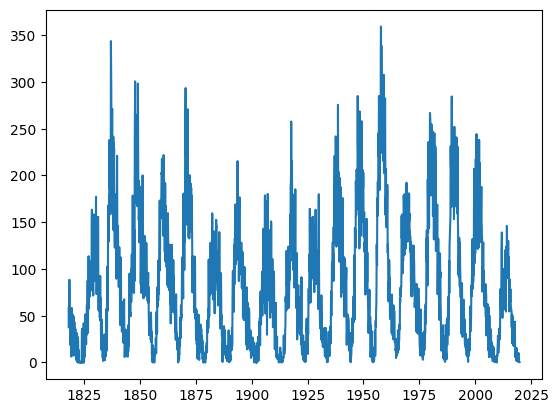

In [86]:
date = data.get_column('Year/Month')
n_spots = data.get_column('Number of Sunspots')

plt.plot(date, n_spots)